In [249]:
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so

# Para clustering
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler 
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

# Para componentes principales
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

**Ejercicio 1**

In [250]:
X = pd.DataFrame()
X["Longitud"] = [93, 94, 96, 101, 102, 103, 104, 106]
X["Ancho"] = [76, 78, 80, 84, 85, 82, 83, 83]

In [251]:
# (a) Normalizar las variables para que tengan media 0 y hacer el diagrama de dispersión.
media = X.mean()
X_star = X - media

In [252]:
X_star.sum()

Longitud    0.0
Ancho       0.0
dtype: float64

In [253]:
# (b) Calcular la matriz de covarianzas y hallar sus autovalores 	y autovectores.
Sigma = np.cov(X.transpose(), bias = 1)
gamma, U = np.linalg.eigh(Sigma) # eigh calcula autovalores y autovectores de matrices simétricas
print("autovalores: ", gamma)
print("autovectores: ", U)

autovalores:  [ 1.68171008 27.66203992]
autovectores:  [[ 0.51170211 -0.85916293]
 [-0.85916293 -0.51170211]]


In [254]:
# Los autovalores que nos devuelve eigh están siempre ordenados de menor a mayor.
# Damos vueltas los autovalores y las columnas de la matriz de autovectores usando np.flip(-,1)
gamma = np.flip(gamma)
print(gamma)
U = np.flip(U, 1)   # U tiene los autovectores de Sigma como columnas
print(U)
# U son las direcciones del nuevo espacio

[27.66203992  1.68171008]
[[-0.85916293  0.51170211]
 [-0.51170211 -0.85916293]]


In [255]:
# (c) Hallar las componentes principales
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_star)
print(principalComponents)

[[ 8.65714403 -1.10004875]
 [ 6.77457687  0.106575  ]
 [ 4.03284678  0.80149665]
 [-2.30977635  1.67963783]
 [-3.68064139  2.02709865]
 [-3.00469799 -1.06209227]
 [-4.37556304 -0.71463144]
 [-6.09388891 -1.73803567]]


C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


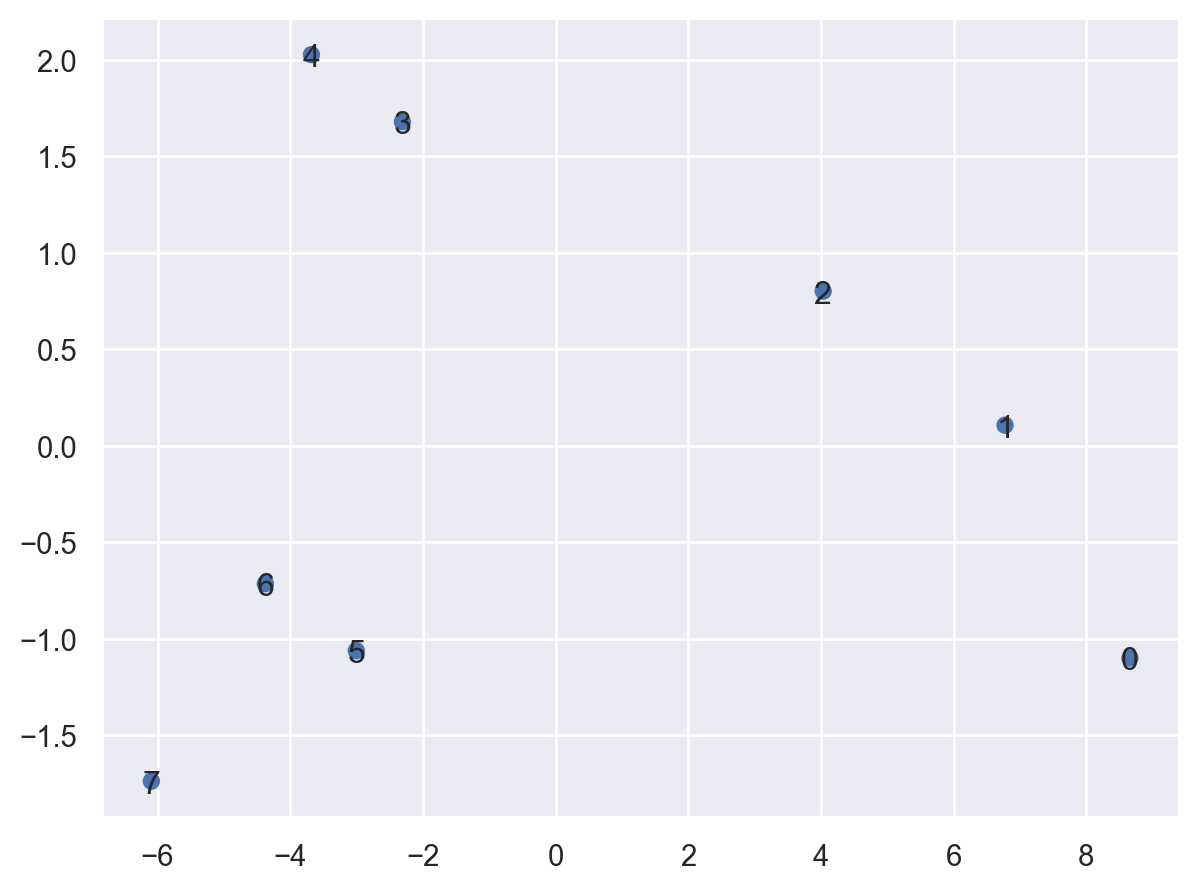

In [256]:
# Graficamos
(
	so.Plot(x = principalComponents[:,0], y = principalComponents[:,1], text = X.index)
	.add(so.Dot())
	.add(so.Text())
)

In [257]:
varianza_total = gamma.sum()
print("Autovalores: ", gamma)
varianzas = []
for i in range(2):
    varianza_explicada = (gamma[i]/varianza_total)
    print("Porcentaje de varianza explicada por la componente ", i + 1, ":" , varianza_explicada)
    varianzas.append(varianza_explicada)
print("Variaza acumulada: " , np.sum(varianzas))

Autovalores:  [27.66203992  1.68171008]
Porcentaje de varianza explicada por la componente  1 : 0.9426893265004208
Porcentaje de varianza explicada por la componente  2 : 0.05731067349957914
Variaza acumulada:  1.0


In [258]:
Sigma

array([[20.859375, 11.421875],
       [11.421875,  8.484375]])

**Ejercicio 2**

In [259]:
A = np.array([[3, 1, 1], [1,3,1], [1,1,5]])

In [260]:
# (a) Hallar los autovalores y autovectores de la matriz de covarianzas (A)
autoval, autovect = np.linalg.eigh(A)
print(autoval)
print(autovect)

[2. 3. 6.]
[[-7.07106781e-01 -5.77350269e-01 -4.08248290e-01]
 [ 7.07106781e-01 -5.77350269e-01 -4.08248290e-01]
 [ 9.66468138e-17  5.77350269e-01 -8.16496581e-01]]


In [261]:
# Los autovalores que nos devuelve eigh están siempre ordenados de menor a mayor.
# Damos vueltas los autovalores y las columnas de la matriz de autovectores usando np.flip(-,1)
autoval = np.flip(autoval)
print(autoval)
autovect = np.flip(autovect, 1)   # U tiene los autovectores de Sigma como columnas
print(autovect)
# U son las direcciones del nuevo espacio

[6. 3. 2.]
[[-4.08248290e-01 -5.77350269e-01 -7.07106781e-01]
 [-4.08248290e-01 -5.77350269e-01  7.07106781e-01]
 [-8.16496581e-01  5.77350269e-01  9.66468138e-17]]


# ¿Cómo sería el item (b)?

In [262]:
import numpy as np

# Matriz de covarianza A
A = np.array([[3, 1, 1],
              [1, 3, 1],
              [1, 1, 5]])

# Paso 1: Hallar los autovalores y autovectores de A
autovalores, autovectores = np.linalg.eigh(A)

# Ordenar en orden descendente
orden = np.argsort(autovalores)[::-1]
autovalores = autovalores[orden]
autovectores = autovectores[:, orden]

# Paso 2: Calcular la proporción de variabilidad explicada por cada componente principal
proporcion_variabilidad = autovalores / np.sum(autovalores)

# Imprimir resultados
print("Autovalores:", autovalores)
print("Autovectores:")
print(autovectores)
print("Proporción de variabilidad explicada por cada componente:")
for i, prop in enumerate(proporcion_variabilidad):
    print(f"Componente {i+1}: {prop:.4f}")

# Paso 3: Expresión de las Componentes Principales
# Expresión de las Componentes Principales
print("\nExpresión de las Componentes Principales:")
for i, autovector in enumerate(autovectores.T):
    componente = f"z{i+1} = "
    for j, valor in enumerate(autovector):
        componente += f"{valor:.4f} * X{j+1} + "  # X1, X2, X3
    componente = componente[:-3]  # Eliminar el último "+"
    print(componente)


Autovalores: [6. 3. 2.]
Autovectores:
[[-4.08248290e-01 -5.77350269e-01 -7.07106781e-01]
 [-4.08248290e-01 -5.77350269e-01  7.07106781e-01]
 [-8.16496581e-01  5.77350269e-01  9.66468138e-17]]
Proporción de variabilidad explicada por cada componente:
Componente 1: 0.5455
Componente 2: 0.2727
Componente 3: 0.1818

Expresión de las Componentes Principales:
z1 = -0.4082 * X1 + -0.4082 * X2 + -0.8165 * X3
z2 = -0.5774 * X1 + -0.5774 * X2 + 0.5774 * X3
z3 = -0.7071 * X1 + 0.7071 * X2 + 0.0000 * X3


In [263]:
# c) Hallar los scores de las primeras dos componentes principales correspondientes a la observación x1 = 2, x2 = 2, x3 = 1 
# (es decir, los valores de z1 y z2 para dicha observación)

# Observación
x = np.array([2, 2, 1])

# Autovectores calculados previamente (usamos solo los dos primeros)
autovectores_principales = autovect[:, :2] # selecciona todas las filas, y las primeras dos columnas (que serían las correspondientes a z1 y z2)

# Calcular los scores de las primeras dos componentes principales para la observación 'x'
scores = (autovectores_principales.T @ x)

# Imprimir los scores
print("Scores de las primeras dos componentes principales:")
print("z1:", scores[0])
print("z2:", scores[1])


Scores de las primeras dos componentes principales:
z1: -2.449489742783178
z2: -1.7320508075688774


In [264]:
autovect[:,:2]

array([[-0.40824829, -0.57735027],
       [-0.40824829, -0.57735027],
       [-0.81649658,  0.57735027]])

**Ejercicio 3** Implementar un programa que reciba como input un archivo de datos y un número p_acum
y devuelva la mínima cantidad de componentes principales que deben considerarse para que el
porcentaje de varianza acumulada sea mayor o igual que p_acum

In [265]:
# Si es necesario (lee el archivo y normaliza los datos):
#data = pd.read_csv(file_path)
#scaler = StandardScaler()
#X = scaler.fit_transform(data)

In [266]:
def pca_varianza_acumulada(datos, p_acum):
    Sigma = np.cov(X.transpose(), bias = 1)
    autoval, autovect = np.linalg.eigh(Sigma)
    autoval = np.flip(autoval)
    autovect = np.flip(autovect, 1)
    varianza_total = np.sum(autoval)
    varianza_explicada = autoval/varianza_total
    varianza_acumulada = np.cumsum(varianza_explicada)
    n_componentes = np.argmax(varianza_acumulada >= p_acum) +1
    return n_componentes, varianza_acumulada

In [267]:
file_path = X  # Cambiar por la ruta del archivo de datos
p_acum = 0.95  # Porcentaje de varianza acumulada deseado
n_componentes, varianza_acumulada = pca_varianza_acumulada(file_path, p_acum)

print(f'Número mínimo de componentes principales necesarios: {n_componentes}')
print(f'Varianza acumulada con {n_componentes} componentes: {varianza_acumulada[n_componentes-1]}')

Número mínimo de componentes principales necesarios: 2
Varianza acumulada con 2 componentes: 1.0


**Ejercicio 4**

In [268]:
data = pd.read_csv("p8-chalets.csv")

In [269]:
data

,Promotora,DuracionHipoteca,PrecioMedio,SuperficieCocina
0,1,8.7,0.3,3.1
1,2,14.3,0.9,7.4
2,3,18.9,1.8,9.0
3,4,19.0,0.8,9.4
4,5,20.5,0.9,8.3
5,6,14.7,1.1,7.6
6,7,18.8,2.5,12.6
7,8,37.3,2.7,18.1
8,9,12.6,1.3,5.9
9,10,25.7,3.4,15.9


In [270]:
# Seleccionar las columnas a escalar
columnas = ['DuracionHipoteca', 'PrecioMedio', 'SuperficieCocina']
# Escalar los datos
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[columnas] = scaler.fit_transform(df[columnas])
df_scaled

,Promotora,DuracionHipoteca,PrecioMedio,SuperficieCocina
0,1,-1.371270,-1.343107,-1.530558
1,2,-0.629327,-0.708568,-0.537888
2,3,-0.019873,0.243240,-0.168523
3,4,-0.006624,-0.814325,-0.076182
4,5,0.192110,-0.708568,-0.330120
5,6,-0.576331,-0.497055,-0.491718
6,7,-0.033122,0.983535,0.662549
7,8,2.417940,1.195048,1.932242
8,9,-0.854560,-0.285542,-0.884168
9,10,0.881058,1.935343,1.424365


C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


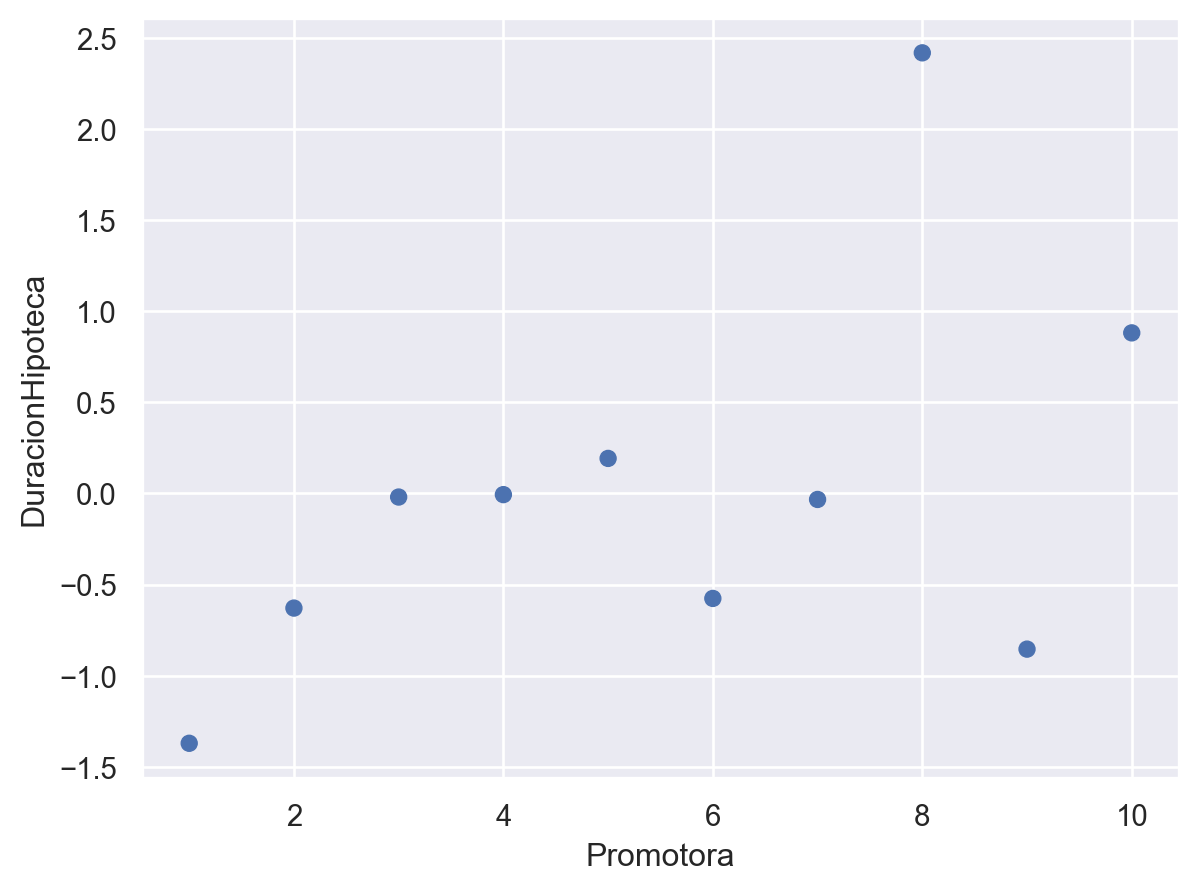

In [271]:
# (a) Graficar los diagramas de dispersión de las variables de a pares. Estimar la presencia de 
# correlación entre las variables a partir de estos gráficos.

(
    so.Plot(data = df_scaled, x="Promotora", y="DuracionHipoteca")
    .add(so.Dot())
)

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

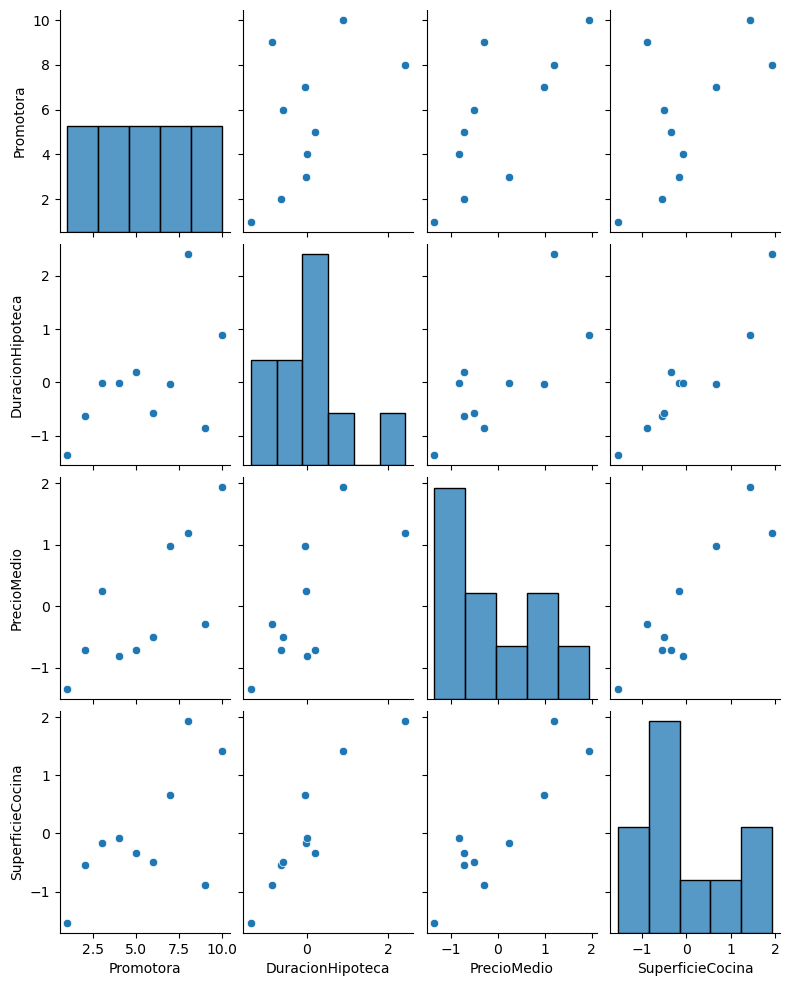

In [272]:
sns.pairplot(df_scaled, aspect=.8)

#  Estimar la presencia de correlación entre las variables a partir de estos gráficos

In [273]:
Sigma = np.cov(df_scaled.transpose(), bias = 1)

In [274]:
Sigma

array([[8.25      , 1.50177245, 2.14156855, 1.83643819],
       [1.50177245, 1.        , 0.72447283, 0.93217635],
       [2.14156855, 0.72447283, 1.        , 0.8906068 ],
       [1.83643819, 0.93217635, 0.8906068 , 1.        ]])

In [275]:
gamma, U = np.linalg.eigh(Sigma) # eigh calcula autovalores y autovectores de matrices simétricas
print("autovalores: ", gamma)
print("autovectores: ", U)

autovalores:  [0.0205929  0.21976852 1.30898933 9.70064925]
autovectores:  [[ 0.01339447  0.11764743 -0.396262   -0.91047026]
 [-0.48190947  0.57725682  0.62645896 -0.20515115]
 [-0.38738918 -0.80674943  0.35831115 -0.26589113]
 [ 0.78582025 -0.04570549  0.56757265 -0.24136864]]


In [276]:
gamma = np.flip(gamma)
U = np.flip(U, 1)
print(gamma)
print(U)

[9.70064925 1.30898933 0.21976852 0.0205929 ]
[[-0.91047026 -0.396262    0.11764743  0.01339447]
 [-0.20515115  0.62645896  0.57725682 -0.48190947]
 [-0.26589113  0.35831115 -0.80674943 -0.38738918]
 [-0.24136864  0.56757265 -0.04570549  0.78582025]]


In [277]:
# Proporción de la variabilidad explicada por cada componente principal
varianza_explicada = gamma / np.sum(gamma)

# Varianza acumulada
varianza_acumulada = np.cumsum(varianza_explicada)

print("Proporción de la varianza explicada por cada componente:", varianza_explicada)
print("Varianza acumulada:", varianza_acumulada)

Proporción de la varianza explicada por cada componente: [0.86227993 0.11635461 0.01953498 0.00183048]
Varianza acumulada: [0.86227993 0.97863454 0.99816952 1.        ]


In [278]:
# (c) Vemos que la primera componente explica más del 80% de la varianza, por lo que sería razonable pensar en un análisis de PCA para reducir
# la dimensión del problema.

In [279]:
# (d) 
primera_componente = U[:, 0]
primera_componente

array([-0.91047026, -0.20515115, -0.26589113, -0.24136864])

In [280]:
# (e) Indicar qué porcentaje de variabilidad total logra explicar esta componente.
varianza_explicada[0] * 100

86.22799336206552

**Ejercicio 5** Considerar el dataset p8-iris.txt, que representa información del largo y ancho del pétalo y
del sépalo de diversas muestras deflores de la especie Iris, la cual se puede distinguir en varias
subespecies. Aplicar el programa del ejercicio anterior para determinar la menor cantidad de
componentes principales necesarias para alcanzar un 90 % de variabilidad. firacar los datos
transformados que se obtienen luego de reducir variables.

In [281]:
# Cargamos el archivo p8-iris.txt
iris = pd.read_csv('p8-iris.txt', sep='\t')
iris.head()

,LongSepalo,AnchoSepalo,LongPetalo,AnchoPetalo
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [282]:
pca_varianza_acumulada(iris, 0.9)

(1, array([0.94268933, 1.        ]))

In [283]:
# (b) Calcular la matriz de covarianzas y hallar sus autovalores 	y autovectores.
media = iris.mean()
X_star = iris - media
Sigma = np.cov(X_star.transpose(), bias = 1)
gamma, U = np.linalg.eigh(Sigma) # eigh calcula autovalores y autovectores de matrices simétricas
# (c) Hallar las componentes principales
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_star)

# Pregunta:
**cuando hago Sigma = np.cov(algo.transpose(), bias = 1), en ese "algo" tengo que poner X o X_star?**

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


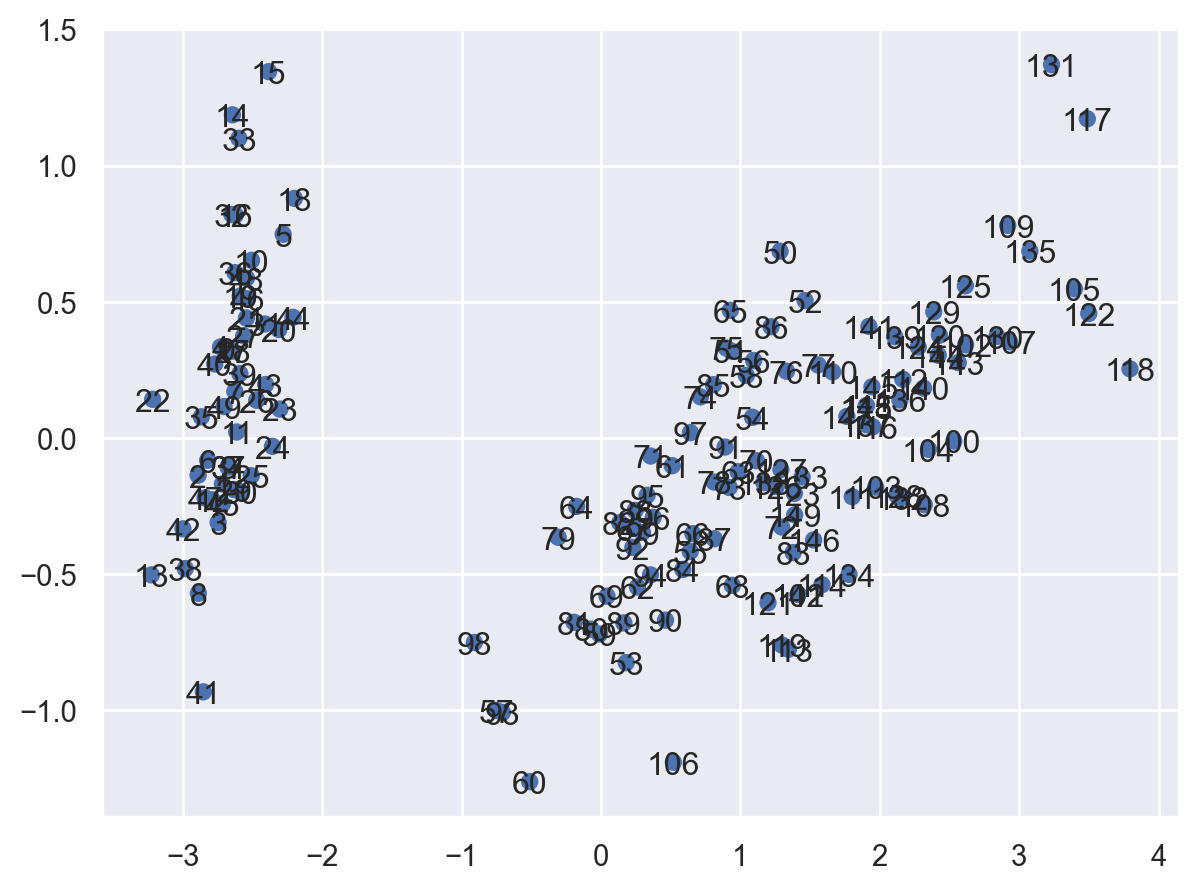

In [284]:
# Graficamos
(
	so.Plot(x = principalComponents[:,0], y = principalComponents[:,1], text = iris.index)
	.add(so.Dot())
	.add(so.Text())
)

# Estará bien?

**Ejercicio 6**

In [285]:
# (a) Calcular las dos primeras componentes principales.
hospitales = pd.read_csv("p8-hospitales-escalado.csv")
hospitales.head()

,Servicio,NI,MO,RE,NE,ICM,ES
0,Cirugia,0.358385,0.304,0.244275,0.257901,0.564103,0.443958
1,Tocoginecologia,1.000000,0.024,0.221374,0.065260,0.008547,0.447995
2,Hematologia,0.000000,0.328,0.503817,0.356053,1.000000,0.082968
3,Cardiologia,0.040369,0.176,0.282443,0.000000,0.675214,0.160020
4,Digestivo,0.044879,0.472,0.229008,0.294376,0.470085,0.130156


In [286]:
X = hospitales.drop("Servicio", axis=1)

In [287]:
Sigma = np.cov(X.transpose(), bias=1)
autoval, autovect = np.linalg.eigh(Sigma)
print(autoval)
print(autovect)
autoval = np.flip(autoval)
autovect = np.flip(autovect, 1)

[0.00444341 0.01249687 0.04479706 0.09911562 0.13403377 0.19544273]
[[-0.55111685 -0.23297336 -0.35586285  0.05114108 -0.09388894 -0.70987656]
 [-0.28650846  0.46819274  0.47086118 -0.43110381 -0.52392663 -0.12902947]
 [ 0.08131668  0.47676026 -0.76376791  0.01548632 -0.37011933  0.21334877]
 [-0.1115553  -0.14364885  0.22002993  0.77438197 -0.54404102  0.15119256]
 [-0.25272672 -0.63002624 -0.14038158 -0.43013031 -0.31628427  0.48419142]
 [ 0.72887265 -0.28574564 -0.0137773  -0.16314027 -0.4285803  -0.42024809]]


In [288]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalComponents

array([[ 0.14281444,  0.06040967],
       [ 0.86685707, -0.31331282],
       [-0.54147388,  0.1719503 ],
       [-0.24172728, -0.24924071],
       [-0.14666936, -0.03103765],
       [ 0.71363325,  1.01279186],
       [-0.34217044, -0.0909605 ],
       [-0.21248087, -0.03004577],
       [-0.14432021, -0.20892222],
       [ 0.55843734, -0.36479119],
       [-0.62232912,  0.46940519],
       [-0.05909119, -0.1009971 ],
       [ 0.02852025, -0.32524906]])

In [289]:
pca.components_

array([[ 0.70987656,  0.12902947, -0.21334877, -0.15119256, -0.48419142,
         0.42024809],
       [ 0.09388894,  0.52392663,  0.37011933,  0.54404102,  0.31628427,
         0.4285803 ]])

In [290]:
# Proporción de la variabilidad explicada por cada componente principal
varianza_explicada = autoval / np.sum(autoval)
for i, av in enumerate(autoval):
    print(f"para el autovalor {av: .5f} la variabilidad explicada es de {varianza_explicada[i] : .5f}")

para el autovalor  0.19544 la variabilidad explicada es de  0.39859
para el autovalor  0.13403 la variabilidad explicada es de  0.27335
para el autovalor  0.09912 la variabilidad explicada es de  0.20214
para el autovalor  0.04480 la variabilidad explicada es de  0.09136
para el autovalor  0.01250 la variabilidad explicada es de  0.02549
para el autovalor  0.00444 la variabilidad explicada es de  0.00906


In [291]:
# Z representa las observaciones transformadas en el espacio de las componentes principales. Z es la proyección de los datos originales de X
# en el espacio definido por los autovectores (componentes principales)
Z = X @ autovect

In [292]:
primera_componente = autovect[:,0]
segunda_componente = autovect[:,1]
print(f"Primera componente: {primera_componente}")
print(f"Segunda componente: {segunda_componente}")

Primera componente: [-0.70987656 -0.12902947  0.21334877  0.15119256  0.48419142 -0.42024809]
Segunda componente: [-0.09388894 -0.52392663 -0.37011933 -0.54404102 -0.31628427 -0.4285803 ]


In [293]:
primera_componente = autovect[:, 0]
primera_componente

array([-0.70987656, -0.12902947,  0.21334877,  0.15119256,  0.48419142,
       -0.42024809])

In [294]:
pca.components_[0]

array([ 0.70987656,  0.12902947, -0.21334877, -0.15119256, -0.48419142,
        0.42024809])

# La notación de Z[:, 0] es válida para matrices numpy, pero para un DataFrame de Pandas, necesitás usar .iloc[] o .loc[].

In [295]:
# Las dos componentes principales:
print(f"Varianza explicada por la 1ra componente principal {primera_componente}: {varianza_explicada[0]:.5f}")
print(f"Varianza explicada por la 2da componente principal {segunda_componente}: {varianza_explicada[1]:.5f}")

Varianza explicada por la 1ra componente principal [-0.70987656 -0.12902947  0.21334877  0.15119256  0.48419142 -0.42024809]: 0.39859
Varianza explicada por la 2da componente principal [-0.09388894 -0.52392663 -0.37011933 -0.54404102 -0.31628427 -0.4285803 ]: 0.27335


Otra forma de hacer el ejercicio con PCA()

In [296]:
# Crear un objeto PCA
pca = PCA(n_components=2)  # Especifica que deseas 2 componentes principales
# Ajustar y transformar los datos
componentes_principales = pca.fit_transform(X)
# Obtener la varianza explicada por cada componente
varianza_explicada = pca.explained_variance_ratio_
print("Varianza explicada por cada componente:", varianza_explicada)

Varianza explicada por cada componente: [0.39859472 0.27335452]


In [302]:
componentes_principales

array([[ 0.14281444,  0.06040967],
       [ 0.86685707, -0.31331282],
       [-0.54147388,  0.1719503 ],
       [-0.24172728, -0.24924071],
       [-0.14666936, -0.03103765],
       [ 0.71363325,  1.01279186],
       [-0.34217044, -0.0909605 ],
       [-0.21248087, -0.03004577],
       [-0.14432021, -0.20892222],
       [ 0.55843734, -0.36479119],
       [-0.62232912,  0.46940519],
       [-0.05909119, -0.1009971 ],
       [ 0.02852025, -0.32524906]])

**(c)** ¿Considera adecuado considerar dos componentes principales?

In [297]:
variabilidad_total = varianza_explicada[0] + varianza_explicada[1]
variabilidad_total

0.6719492321554137

No, porque entre las dos componentes principales explican alrededor del 67% de la varianza.
**está bien la respuesta?**

In [298]:
from sklearn.metrics import mean_squared_error, r2_score

In [299]:
Z = X @ autovect

In [300]:
# (d) Hallar la correlación entre las nuevas variables y las originales (por medio de R2)
r2 = r2_score(X,Z)
r2

-6.311241182024986

# Por qué me tira un r2 negativo?

**Ejercicio 7**

In [347]:
calidad_agua = pd.read_csv("p8-calidad-agua.csv")
calidad_agua.columns = calidad_agua.columns.str.strip() # bueno no era necesario jajaja
calidad_agua.head()

,x1,x2,x3,x4
0,0.01411,0.12445,1.04539,0.04318
1,-0.17200,1.01532,0.05276,-0.18680
2,1.03277,-0.00024,0.03330,-0.02765
3,0.06603,0.77159,-0.26459,0.05418
4,0.98548,0.06333,-0.03382,-0.09569


C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


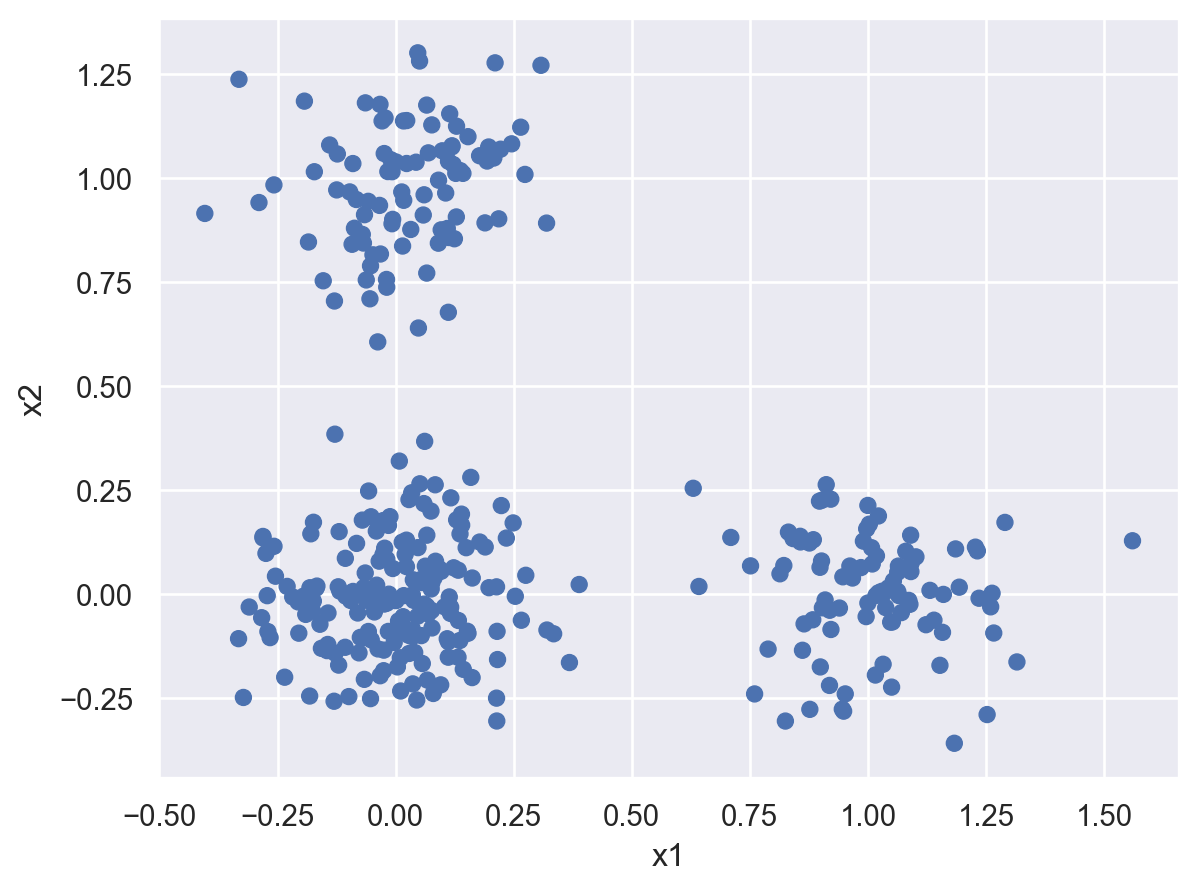

In [348]:
# (a) Realizar un gráfico de dispersión de las variables x1 y x2. ¿Cuántos clusters puede observar?
(
    so.Plot(data = calidad_agua, x = "x1", y = "x2")
    .add(so.Dot())
)

# 3 clusters

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


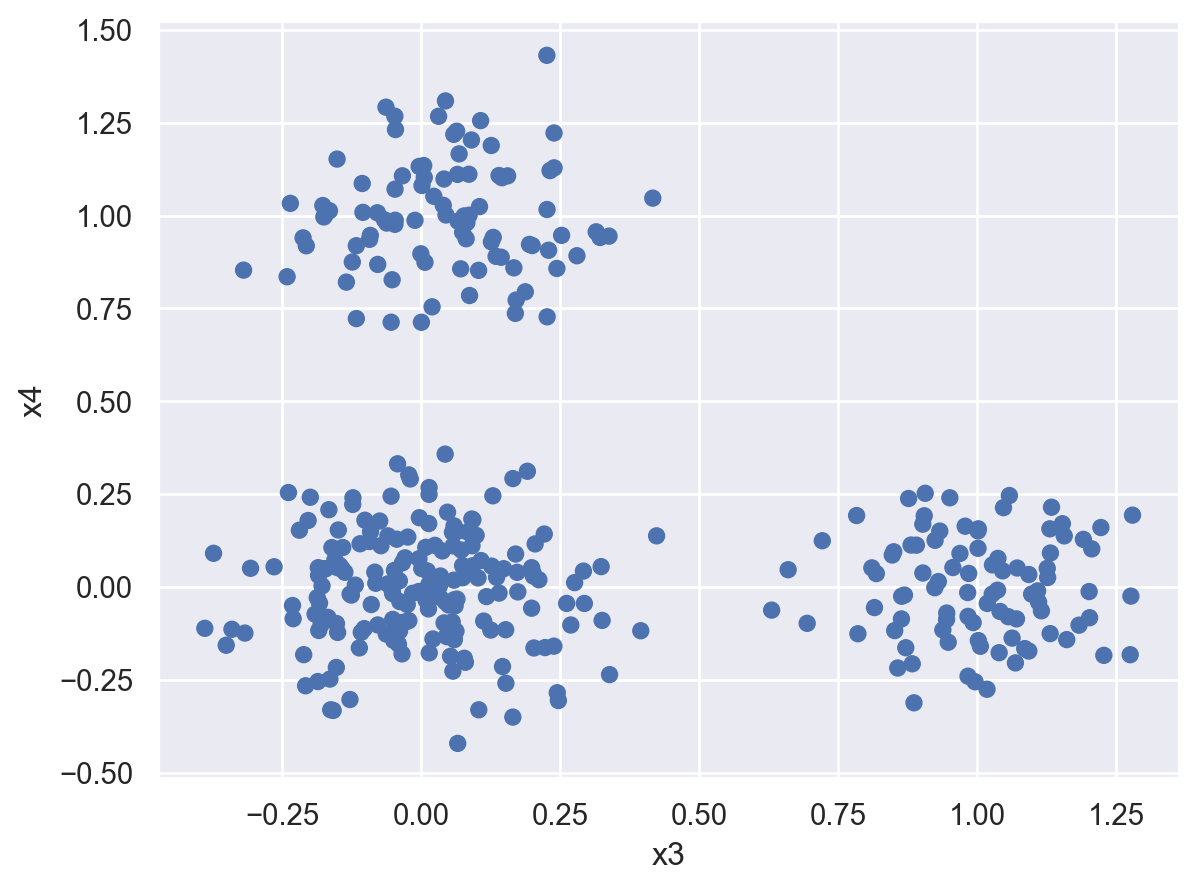

In [349]:
# (a) Realizar un gráfico de dispersión de las variables x3 y x4. ¿Cuántos clusters puede observar?
(
    so.Plot(data = calidad_agua, x = "x3", y = "x4")
    .add(so.Dot())
)

# 3 clusters

In [350]:
# (c) Realizar la descomposición en componentes principales de los datos y realizar un gráfico de dispersión de las dos primeras componentes principales z1 y z2. 
# ¿Cuántos clusters puede observar?
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(calidad_agua)

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


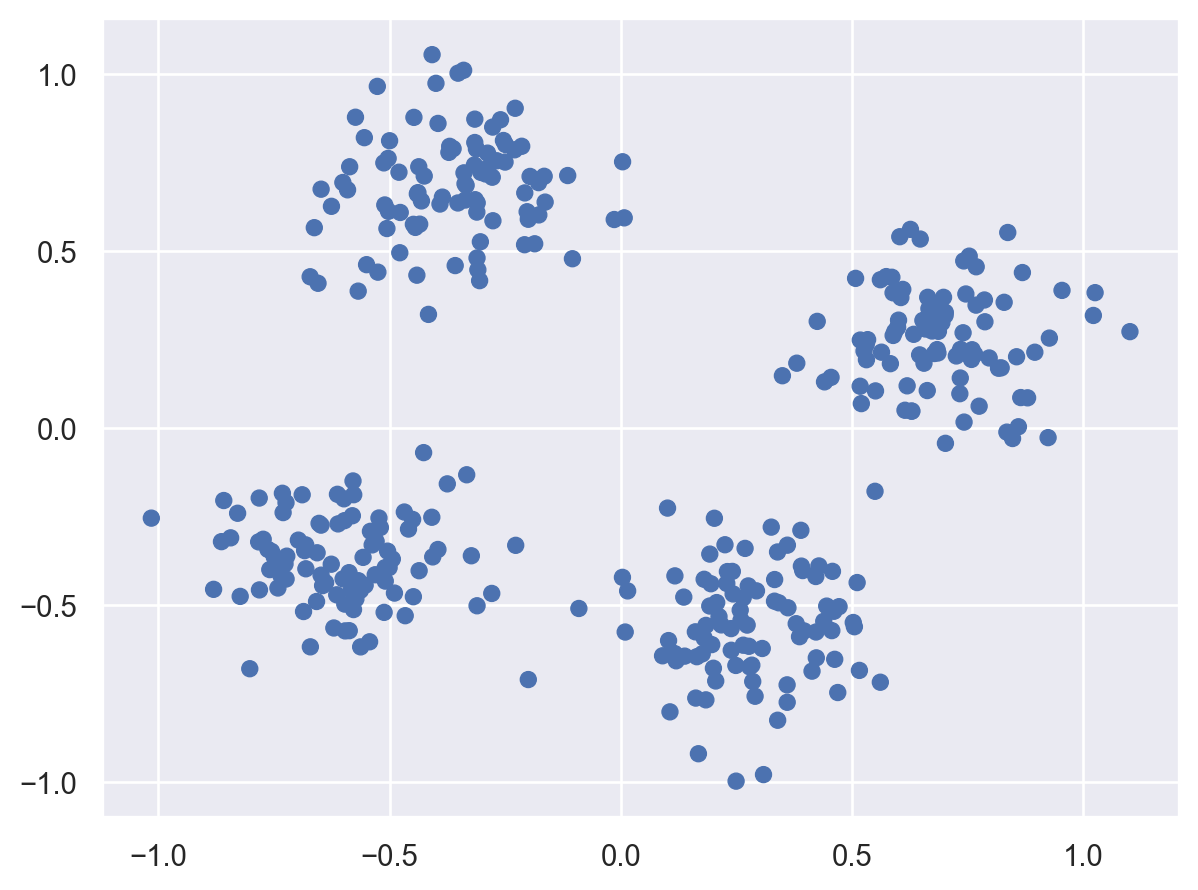

In [351]:
(
    so.Plot(x = principalComponents[:,0], y = principalComponents[:,1])
    .add(so.Dot())
)

# Se observan 4 clusters

In [355]:
# (d) Utilizando el método de clustering que considere apropiado, clasificar los datos en 4 clusters utilizando solo las variables z1 y z2 y 
# realizar nuevamente el gráfico de dispersión de z1 y z2 coloreando cada punto según el cluster al que pertenece.
W = pd.DataFrame()
W["z1"] = principalComponents[:,0]
W["z2"] = principalComponents[:,1]
W.head()

,z1,z2
0,-0.600860,-0.426496
1,0.183578,-0.768623
2,0.685302,0.212256
3,0.388929,-0.289147
4,0.733599,0.141431


In [346]:
#W = W.values # para transformarlo en matriz

C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


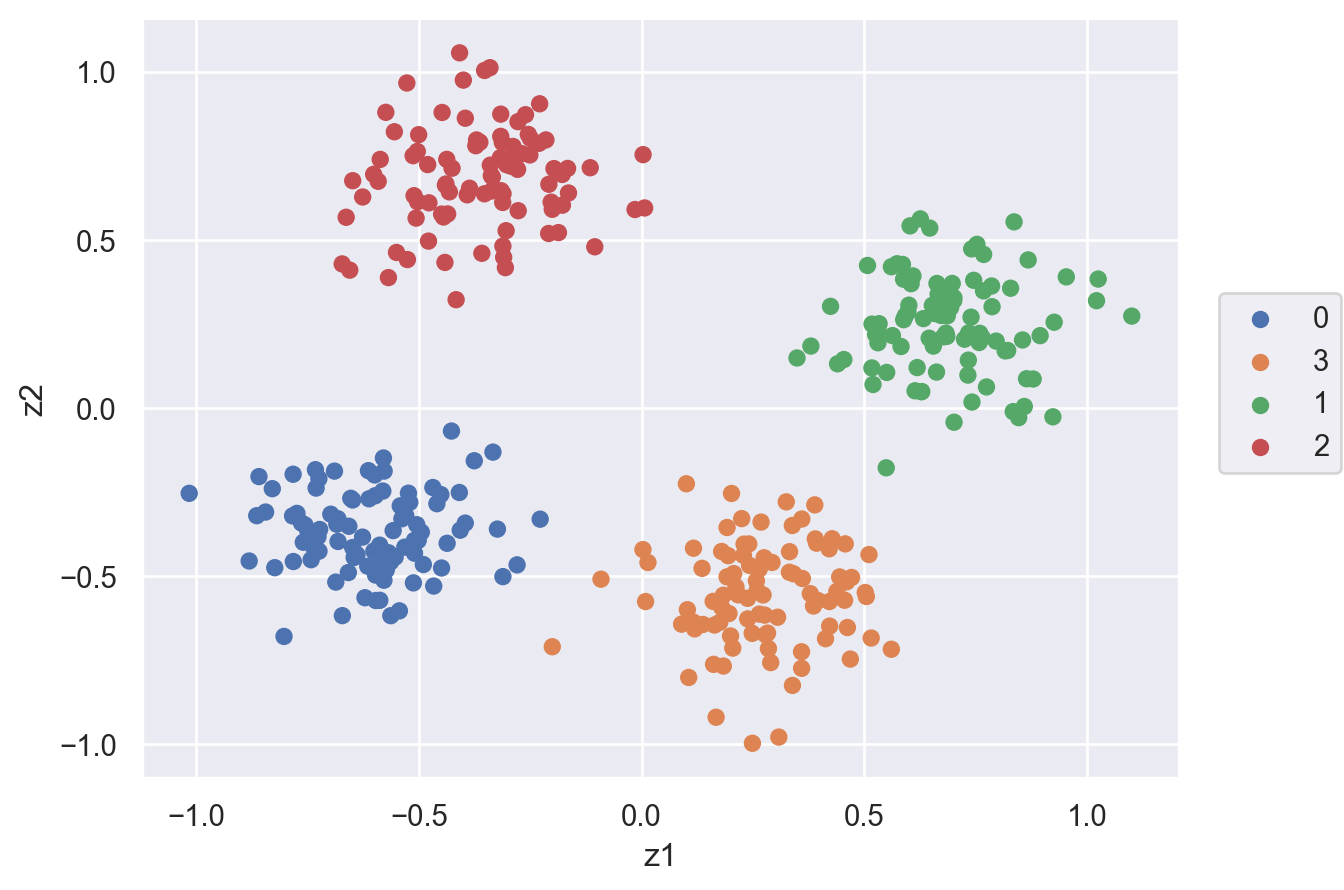

In [359]:
# Creo que lo mejor sería hacer K-Means, porque por ejemplo K-NN es un método más de clasificación que de clustering. 
kmeans = KMeans(n_clusters=4)
etiquetas = kmeans.fit_predict(W)
(
    so.Plot(data = W, x = "z1", y = "z2", color = etiquetas.astype(str))
    .add(so.Dot())
)

C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


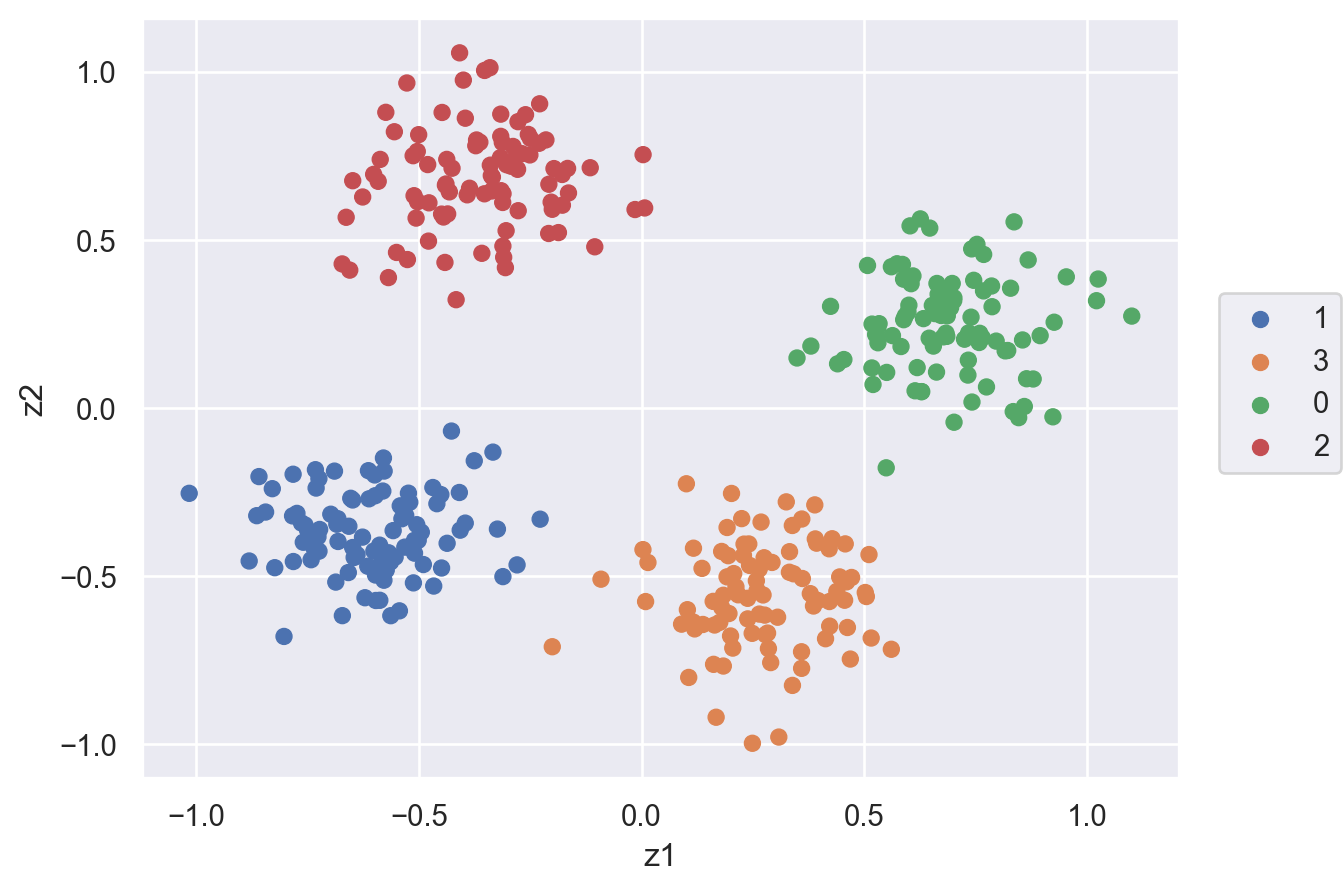

In [360]:
# Lo pongo todo en el mismo lugar para que se entienda mejor:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(calidad_agua)
W = pd.DataFrame()
W["z1"] = principalComponents[:,0]
W["z2"] = principalComponents[:,1]
kmeans = KMeans(n_clusters=4)
etiquetas = kmeans.fit_predict(W)
(
    so.Plot(data = W, x = "z1", y = "z2", color = etiquetas.astype(str))
    .add(so.Dot())
)